In [38]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\lifen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Make sure the following values are correct before run this script

- **User name and password**

In [40]:
username = 'APTX9998'
password = 'Acp123456'

- **Maximum tweets**

In [41]:
max_tweets = 1000

- **SEARCH KEY WORDS**

In [42]:
topic = 'Wealth Management'

- OUTPUT NAME

In [43]:
output = 'BOA_tweets.csv'

## Browser options

In [44]:
options = webdriver.FirefoxOptions()
options.add_argument('--headless')

In [45]:
def scroll_down(browser):
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

In [46]:
def start_twitter_search():
    with webdriver.Firefox(options=options) as browser:
        url = 'https://twitter.com/BankofAmerica'
        browser.get(url)

        wait = WebDriverWait(browser, 10)

        login_button = wait.until(EC.presence_of_element_located((By.XPATH, '//a[@href="/login"]')))
        login_button.click()

        username_input = wait.until(EC.presence_of_element_located((By.XPATH, './/input[@name="text"]')))
        username_input.send_keys(username)
        username_input.send_keys(Keys.RETURN)

        time.sleep(3)

        password_input = wait.until(EC.presence_of_element_located((By.XPATH, './/input[@name="password"]')))
        password_input.send_keys(password)
        password_input.send_keys(Keys.RETURN)

        wait.until(EC.presence_of_element_located((By.XPATH, '//input[@enterkeyhint="search"]')))

        search_input = browser.find_element(By.XPATH, '//input[@enterkeyhint="search"]')
        search_input.send_keys(topic)
        search_input.send_keys(Keys.RETURN)

        current_tweets = 0
        user_data = []
        text_data = []
        time_data = []

        while current_tweets < max_tweets:

            for _ in range(5):
                scroll_down(browser)

            tweets = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//article[@role="article"]')))

            for tweet in tweets:
                try:
                    user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                    text = tweet.find_element(By.XPATH, ".//div[@lang]").text
                    tweet_time = tweet.find_element(By.XPATH, ".//time").get_attribute("datetime")

                    tweets_data = [user, text, tweet_time]
                except Exception as e:
                    print(f"Error extracting tweet: {e}")
                    tweets_data = ['user', 'text', "time"]

                user_data.append(tweets_data[0])
                text_data.append(" ".join(tweets_data[1].split()))
                time_data.append(tweets_data[2])

                current_tweets += 1

            print(f"Scraped {current_tweets} tweets")

            if current_tweets >= max_tweets:
                break

        df = pd.DataFrame({'user': user_data, 'text': text_data, 'time': time_data})
        df.to_csv(output, index=False)
        print(f"Total {current_tweets} tweets scraped")

In [47]:
def main():
    start_twitter_search()

In [48]:
if __name__ == "__main__":
   main()

Scraped 7 tweets
Scraped 17 tweets
Scraped 24 tweets
Scraped 31 tweets
Scraped 39 tweets
Scraped 43 tweets
Scraped 47 tweets
Scraped 51 tweets
Scraped 55 tweets
Scraped 59 tweets
Scraped 63 tweets
Scraped 67 tweets
Scraped 71 tweets
Scraped 75 tweets
Scraped 79 tweets
Scraped 83 tweets
Scraped 87 tweets
Scraped 91 tweets
Scraped 95 tweets
Scraped 99 tweets
Scraped 103 tweets
Scraped 107 tweets
Scraped 111 tweets
Scraped 115 tweets
Scraped 119 tweets
Scraped 123 tweets
Scraped 127 tweets
Scraped 131 tweets
Scraped 135 tweets
Scraped 139 tweets
Scraped 143 tweets
Scraped 147 tweets
Scraped 151 tweets
Scraped 155 tweets
Scraped 159 tweets
Scraped 163 tweets
Scraped 167 tweets
Scraped 171 tweets
Scraped 175 tweets
Scraped 179 tweets
Scraped 183 tweets
Scraped 187 tweets
Scraped 191 tweets
Scraped 195 tweets
Scraped 199 tweets
Scraped 203 tweets
Scraped 207 tweets
Scraped 211 tweets
Scraped 215 tweets
Scraped 219 tweets
Scraped 223 tweets
Scraped 227 tweets
Scraped 231 tweets
Scraped 235 tw

In [55]:
df = pd.read_csv(r"C:\Users\lifen\AppData\Local\Programs\Microsoft VS Code\BOA_tweets.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    1003 non-null   object
 1   text    1003 non-null   object
 2   time    1003 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [56]:
df

,user,text,time
0,@GCEI_Naples,Our experienced financial professionals can as...,2024-01-04T13:00:12.000Z
1,@Charleston_Law,"Julianne Naff (’12), SVP and Regional Manager,...",2024-01-03T19:57:37.000Z
2,@acsgbl,When you think about some of the biggest chall...,2024-01-04T15:02:45.000Z
3,@SGWealthMgmt,The SG Wealth Management team are deeply sadde...,2023-12-31T12:30:06.000Z
4,@JeanneBartram,Awards recognise excellence in wealth manageme...,2024-01-03T18:25:49.000Z
...,...,...,...
998,@BeWellAdvised,Does a new year signal new #investment themes?...,2024-01-04T18:05:13.000Z
999,@ASK_WM,Explore key investment themes in our latest re...,2023-12-30T05:30:00.000Z
1000,@Urnaa26450703,Agreed,2024-01-04T13:59:24.000Z
1001,@LumidaWealth,"Today, the human is prompting the AI. Tomorrow...",2024-01-03T19:02:02.000Z


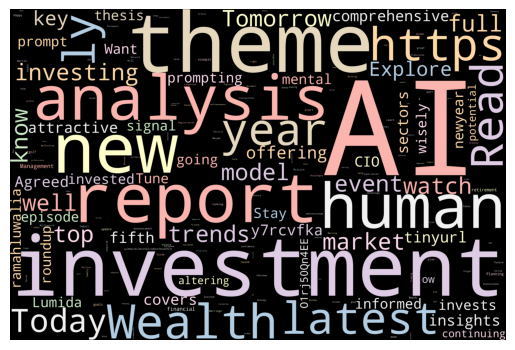

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#Creating the text variable
text = " ".join(text for text in df.text)

#We can generate the wordcloud in the following manner.
# Generate word cloud
word_cloud = WordCloud(
    width=6000,
    height=4000,
    random_state=1,
    background_color="black",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text)


# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.savefig(r'D:\5.ACP\BOAcloud.png')

plt.show()